# 01 - Veri Keşfi (Exploratory Data Analysis)

Bu defterde, elektrik kesintisi tahmin projesi için sağlanan veri setleri incelenecek ve görselleştirilecektir.

Amacımız:
- Veriyi tanımak
- Zaman serisi yapısının farkına varmak
- Mevsimsellik, trend gibi örüntüleri gözlemlemek
- Özellik mühendisliğine zemin hazırlamak

In [22]:
import pandas as pd

# Veri Yolları
train_path = "../data/train.csv"
test_path = "../data/test.csv"
weather_path = "../data/weather.csv"
holidays_path = "../data/holidays.csv"
sample_sub_path = "../data/sample_submission.csv"

# CSV'leri Oku
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
weather_df = pd.read_csv(weather_path)
holidays_df = pd.read_csv(holidays_path)
sample_sub_df = pd.read_csv(sample_sub_path)

In [12]:
print(" Train veri seti boyutu:", train_df.shape)
print("\n ilk 5 satır:")
display(train_df.head())

print("\n Veri tipi bilgileri:")
display(train_df.info())

print("\n Eksik değer sayısı:")
train_df.isnull().sum()

 Train veri seti boyutu: (48148, 4)

 ilk 5 satır:


,tarih,ilce,bildirimsiz_sum,bildirimli_sum
0,2021-01-01,izmir-aliaga,5,0
1,2021-01-02,izmir-aliaga,13,0
2,2021-01-03,izmir-aliaga,4,0
3,2021-01-04,izmir-aliaga,9,0
4,2021-01-05,izmir-aliaga,2,0



 Veri tipi bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48148 entries, 0 to 48147
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tarih            48148 non-null  object
 1   ilce             48148 non-null  object
 2   bildirimsiz_sum  48148 non-null  int64 
 3   bildirimli_sum   48148 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.5+ MB


None


 Eksik değer sayısı:


tarih              0
ilce               0
bildirimsiz_sum    0
bildirimli_sum     0
dtype: int64

In [14]:
print("Farklı ilçe sayısı:", train_df["ilce"].nunique())
print("\n ilk 5 ilçe ismi:", train_df["ilce"].unique()[:5])

Farklı ilçe sayısı: 47

 ilk 5 ilçe ismi: ['izmir-aliaga' 'izmir-bayindir' 'izmir-bayrakli' 'izmir-bergama'
 'izmir-bornova']


In [15]:
# Tarih sütununu datetime formatına çevir
train_df["tarih"] = pd.to_datetime(train_df["tarih"])

# Tarihe göre sırala
train_df = train_df.sort_values(by=["ilce","tarih"]).reset_index(drop=True)

train_df.head()

,tarih,ilce,bildirimsiz_sum,bildirimli_sum
0,2021-01-01,izmir-aliaga,5,0
1,2021-01-02,izmir-aliaga,13,0
2,2021-01-03,izmir-aliaga,4,0
3,2021-01-04,izmir-aliaga,9,0
4,2021-01-05,izmir-aliaga,2,0


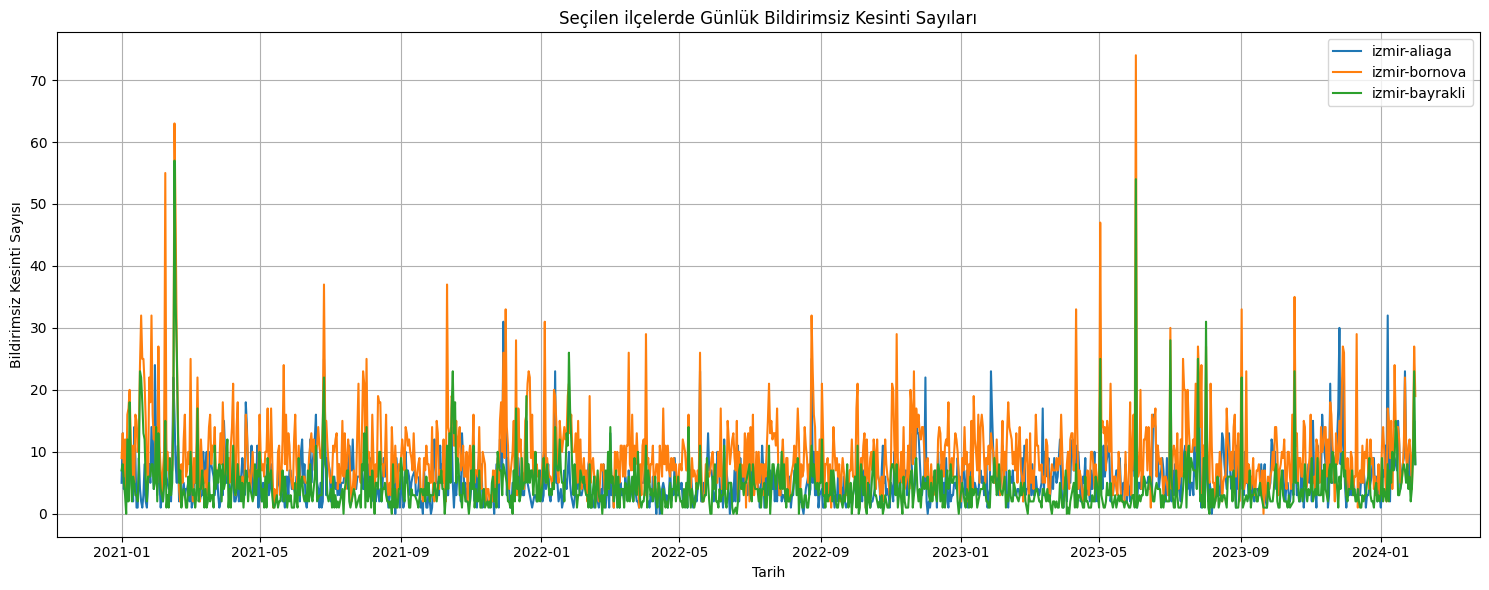

In [16]:
import matplotlib.pyplot as plt

secili_ilceler =["izmir-aliaga", "izmir-bornova", "izmir-bayrakli"]

plt.figure(figsize=(15, 6))

for ilce in secili_ilceler:
    ilce_df = train_df[train_df["ilce"] == ilce]
    plt.plot(ilce_df["tarih"], ilce_df["bildirimsiz_sum"], label=ilce)

plt.title("Seçilen ilçelerde Günlük Bildirimsiz Kesinti Sayıları")    
plt.xlabel("Tarih")
plt.ylabel("Bildirimsiz Kesinti Sayısı")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


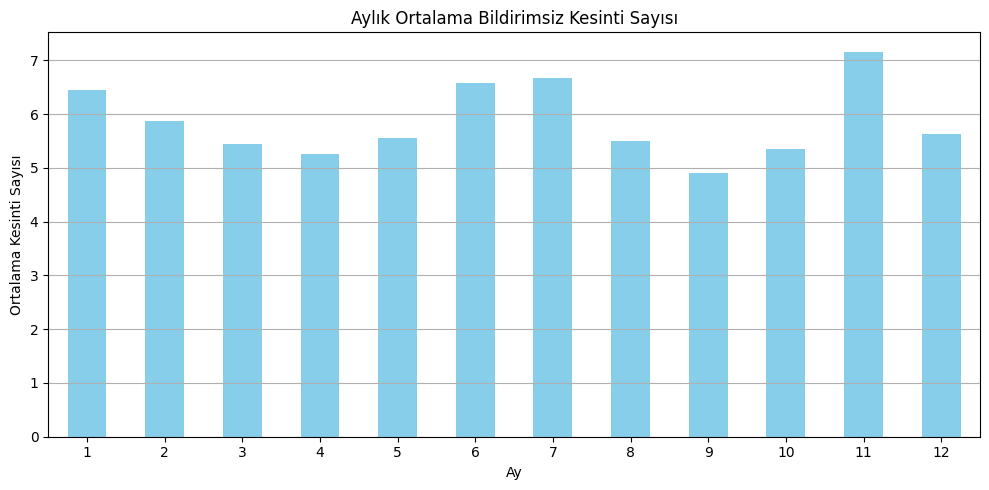

In [17]:
# Ay bilgisi çıkar
train_df["ay"] = train_df["tarih"].dt.month

# Ay bazında ortalama bildirimsiz kesinti
aylik_ortalama = train_df.groupby("ay")["bildirimsiz_sum"].mean()

# Çiz
plt.figure(figsize=(10, 5))
aylik_ortalama.plot(kind="bar", color="skyblue")
plt.title("Aylık Ortalama Bildirimsiz Kesinti Sayısı")
plt.xlabel("Ay")
plt.ylabel("Ortalama Kesinti Sayısı")
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


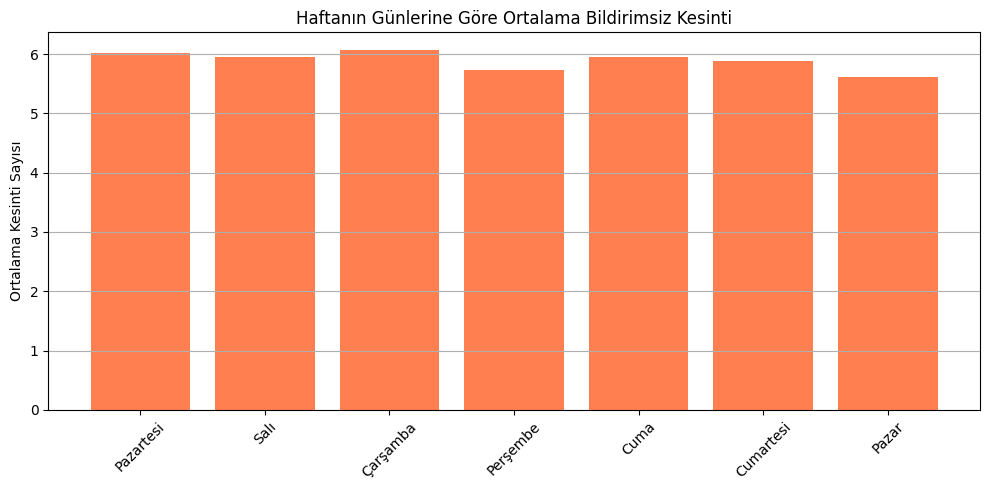

In [18]:
# Haftanın günü (0 = Pazartesi, 6 = Pazar)
train_df["gun"] = train_df["tarih"].dt.dayofweek

# Gün bazlı ortalama
gun_ortalama = train_df.groupby("gun")["bildirimsiz_sum"].mean()

# Gün isimleri
gun_isimleri = ["Pazartesi", "Salı", "Çarşamba", "Perşembe", "Cuma", "Cumartesi", "Pazar"]

# Çiz
plt.figure(figsize=(10, 5))
plt.bar(gun_isimleri, gun_ortalama, color="coral")
plt.title("Haftanın Günlerine Göre Ortalama Bildirimsiz Kesinti")
plt.ylabel("Ortalama Kesinti Sayısı")
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

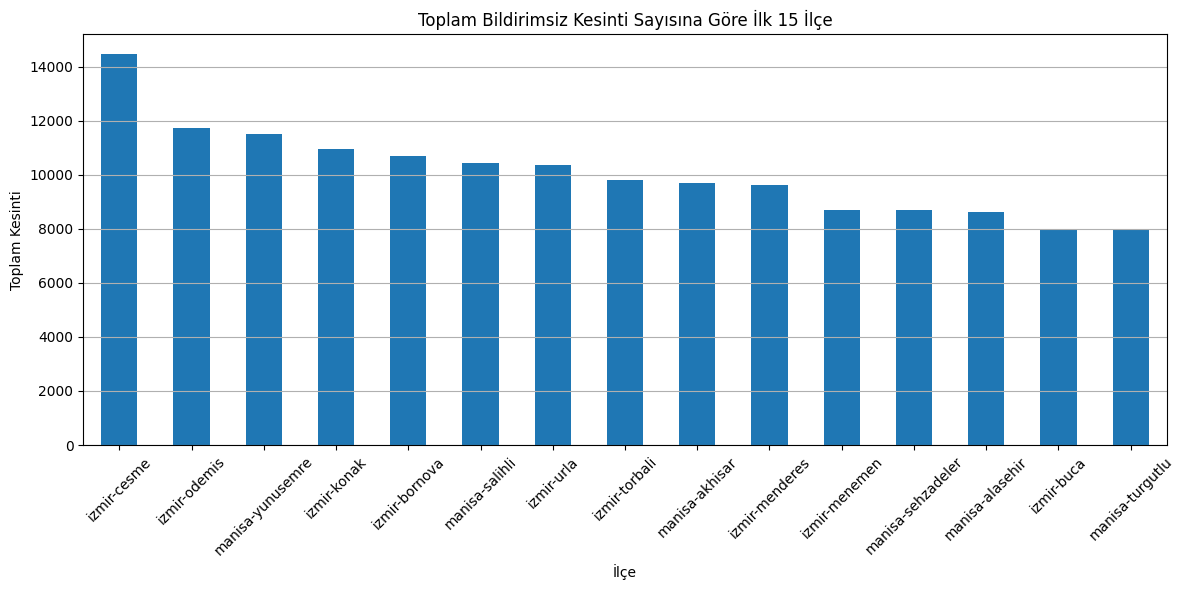

In [19]:
# İlçe bazında toplam bildirimsiz kesinti
ilce_toplam = train_df.groupby("ilce")["bildirimsiz_sum"].sum().sort_values(ascending=False)

# En çok kesinti yaşanan ilk 15 ilçe
plt.figure(figsize=(12, 6))
ilce_toplam.head(15).plot(kind="bar")
plt.title("Toplam Bildirimsiz Kesinti Sayısına Göre İlk 15 İlçe")
plt.ylabel("Toplam Kesinti")
plt.xlabel("İlçe")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [23]:
# Datetime'a çevir
weather_df["date"] = pd.to_datetime(weather_df["date"])

# Yeni tarih sütunu (sadece gün)
weather_df["tarih"] = weather_df["date"].dt.date

# Kontrol: İlk birkaç satır
weather_df[["date", "tarih", "name"]].head()

,date,tarih,name
0,2021-01-01 00:00:00,2021-01-01,Manisa-Ahmetli
1,2021-01-01 01:00:00,2021-01-01,Manisa-Ahmetli
2,2021-01-01 02:00:00,2021-01-01,Manisa-Ahmetli
3,2021-01-01 03:00:00,2021-01-01,Manisa-Ahmetli
4,2021-01-01 04:00:00,2021-01-01,Manisa-Ahmetli


In [24]:
# Gruplanacak sayısal sütunlar
sayisal_sutunlar = [
    "t_2m:C", "effective_cloud_cover:p", "global_rad:W",
    "relative_humidity_2m:p", "wind_dir_10m:d", "wind_speed_10m:ms",
    "prob_precip_1h:p", "t_apparent:C"
]

# Gruplama ve günlük ortalama alma
weather_daily_df = weather_df.groupby(["name", "tarih"])[sayisal_sutunlar].mean().reset_index()

# Kontrol: İlk birkaç satır
weather_daily_df.head()

,name,tarih,t_2m:C,effective_cloud_cover:p,global_rad:W,relative_humidity_2m:p,wind_dir_10m:d,wind_speed_10m:ms,prob_precip_1h:p,t_apparent:C
0,Izmir-Aliaga,2021-01-01,13.275000,55.045833,73.020833,85.991667,167.204167,4.266667,1.000000,13.929167
1,Izmir-Aliaga,2021-01-02,12.870833,36.125000,92.858333,82.137500,106.650000,2.891667,1.000000,13.645833
2,Izmir-Aliaga,2021-01-03,12.633333,64.870833,39.266667,79.120833,122.520833,3.437500,8.429167,12.845833
3,Izmir-Aliaga,2021-01-04,13.733333,47.783333,78.945833,70.312500,123.408333,4.608333,1.275000,13.775000
4,Izmir-Aliaga,2021-01-05,14.375000,30.379167,95.716667,75.220833,195.720833,3.991667,10.720833,14.900000


In [25]:
weather_daily_df["name"].nunique(), weather_daily_df["name"].unique()

(47,
 array(['Izmir-Aliaga', 'Izmir-Balcova', 'Izmir-Bayindir',
        'Izmir-Bayrakli', 'Izmir-Bergama', 'Izmir-Beydag', 'Izmir-Bornova',
        'Izmir-Buca', 'Izmir-Cesme', 'Izmir-Cigli', 'Izmir-Dikili',
        'Izmir-Foca', 'Izmir-Gaziemir', 'Izmir-Guzelbahce',
        'Izmir-Karabaglar', 'Izmir-Karaburun', 'Izmir-Karsiyaka',
        'Izmir-Kemalpasa', 'Izmir-Kinik', 'Izmir-Kiraz', 'Izmir-Konak',
        'Izmir-Menderes', 'Izmir-Menemen', 'Izmir-Narlidere',
        'Izmir-Odemis', 'Izmir-Seferihisar', 'Izmir-Selcuk', 'Izmir-Tire',
        'Izmir-Torbali', 'Izmir-Urla', 'Manisa-Ahmetli', 'Manisa-Akhisar',
        'Manisa-Alasehir', 'Manisa-Demirci', 'Manisa-Golmarmara',
        'Manisa-Gordes', 'Manisa-Kirkagac', 'Manisa-Koprubasi',
        'Manisa-Kula', 'Manisa-Salihli', 'Manisa-Sarigol',
        'Manisa-Saruhanli', 'Manisa-Sehzadeler', 'Manisa-Selendi',
        'Manisa-Soma', 'Manisa-Turgutlu', 'Manisa-Yunusemre'], dtype=object))

In [26]:
# weather verisindeki "name" kolonunu, train'deki "ilce" formatına çevir
def istasyon_to_ilce(name):
    return name.lower().replace(" ", "").replace("ı", "i")

# Yeni sütun: ilce formatı
weather_daily_df["ilce"] = weather_daily_df["name"].apply(istasyon_to_ilce)

# Kontrol edelim
weather_daily_df[["name", "ilce"]].drop_duplicates().head()


,name,ilce
0,Izmir-Aliaga,izmir-aliaga
1155,Izmir-Balcova,izmir-balcova
2310,Izmir-Bayindir,izmir-bayindir
3465,Izmir-Bayrakli,izmir-bayrakli
4620,Izmir-Bergama,izmir-bergama


In [27]:
# Test setinde hedef (bildirimsiz_sum) yok, onu ekleyelim
test_df["bildirimsiz_sum"] = None  # veya np.nan

# Ortak sütunları hizalayalım
ortak_kolonlar = ["tarih", "ilce", "bildirimsiz_sum", "bildirimli_sum"]  # train ile uyumlu

# Train ve test birleştirme
combined_df = pd.concat([
    train_df[ortak_kolonlar],
    test_df[ortak_kolonlar]
], ignore_index=True)

# Tarihi datetime yapalım (önlem)
combined_df["tarih"] = pd.to_datetime(combined_df["tarih"])

# Kontrol
combined_df.head()


,tarih,ilce,bildirimsiz_sum,bildirimli_sum
0,2021-01-01,izmir-aliaga,5,0
1,2021-01-02,izmir-aliaga,13,0
2,2021-01-03,izmir-aliaga,4,0
3,2021-01-04,izmir-aliaga,9,0
4,2021-01-05,izmir-aliaga,2,0


In [28]:
# Hava verisinde tarih datetime değil, çevirelim
weather_daily_df["tarih"] = pd.to_datetime(weather_daily_df["tarih"])

# Merge işlemi: tarih ve ilçe üzerinden birleştir
combined_df = combined_df.merge(
    weather_daily_df.drop(columns=["name"]),  # name sütunu gereksiz artık
    on=["ilce", "tarih"],
    how="left"  # test verisi için hava eksik olabilir
)

# Kontrol: ilk satırlar
combined_df.head()


,tarih,ilce,bildirimsiz_sum,bildirimli_sum,t_2m:C,effective_cloud_cover:p,global_rad:W,relative_humidity_2m:p,wind_dir_10m:d,wind_speed_10m:ms,prob_precip_1h:p,t_apparent:C
0,2021-01-01,izmir-aliaga,5,0,13.275000,55.045833,73.020833,85.991667,167.204167,4.266667,1.000000,13.929167
1,2021-01-02,izmir-aliaga,13,0,12.870833,36.125000,92.858333,82.137500,106.650000,2.891667,1.000000,13.645833
2,2021-01-03,izmir-aliaga,4,0,12.633333,64.870833,39.266667,79.120833,122.520833,3.437500,8.429167,12.845833
3,2021-01-04,izmir-aliaga,9,0,13.733333,47.783333,78.945833,70.312500,123.408333,4.608333,1.275000,13.775000
4,2021-01-05,izmir-aliaga,2,0,14.375000,30.379167,95.716667,75.220833,195.720833,3.991667,10.720833,14.900000


In [30]:
# Tatil tarihi oluştur
holidays_df["tarih"] = pd.to_datetime(
    holidays_df[["Yıl", "Ay", "Gün"]].rename(columns={"Yıl": "year", "Ay": "month", "Gün": "day"})
)

# Sadece tarih ve etiket
tatil_tarihleri = holidays_df["tarih"].unique()


In [31]:
# Tatil günleri için binary sütun ekle
combined_df["tatil_mi"] = combined_df["tarih"].isin(tatil_tarihleri).astype(int)

# Kontrol
combined_df[["tarih", "tatil_mi"]].drop_duplicates().sort_values("tarih").head(10)


,tarih,tatil_mi
0,2021-01-01,1
1,2021-01-02,0
2,2021-01-03,0
3,2021-01-04,0
4,2021-01-05,0
5,2021-01-06,0
6,2021-01-07,0
7,2021-01-08,0
8,2021-01-09,0
9,2021-01-10,0


In [32]:
# Tarih bazlı türetilecek sütunlar
combined_df["yil"] = combined_df["tarih"].dt.year
combined_df["ay"] = combined_df["tarih"].dt.month
combined_df["gun"] = combined_df["tarih"].dt.day
combined_df["hafta"] = combined_df["tarih"].dt.isocalendar().week
combined_df["haftanin_gunu"] = combined_df["tarih"].dt.dayofweek  # 0 = Pazartesi

# Kontrol
combined_df[["tarih", "yil", "ay", "gun", "hafta", "haftanin_gunu", "tatil_mi"]].head()


,tarih,yil,ay,gun,hafta,haftanin_gunu,tatil_mi
0,2021-01-01,2021,1,1,53,4,1
1,2021-01-02,2021,1,2,53,5,0
2,2021-01-03,2021,1,3,53,6,0
3,2021-01-04,2021,1,4,1,0,0
4,2021-01-05,2021,1,5,1,1,0


In [33]:
combined_df.to_csv("../data/combined_df.csv", index=False)